#LOAD DATASET


In [1]:
import keras

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [3]:
# Visulaizing Dataset

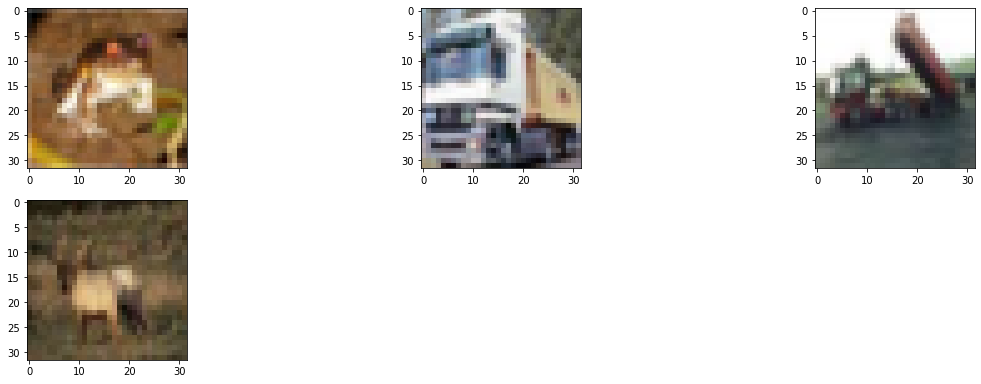

In [4]:
n=4
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

#importing required modules and layers


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
#normalize the dataset

In [9]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [10]:
# one-hot encoding for target classes

In [11]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [12]:
#Creating sequential model and adding layers

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
#optimizing and compiling the model

In [17]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [19]:
# Training the model

In [20]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 156s 99ms/step - loss: 1.7007 - accuracy: 0.3855 - val_loss: 1.3776 - val_accuracy: 0.5054
Epoch 2/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.3217 - accuracy: 0.5245 - val_loss: 1.1689 - val_accuracy: 0.5831
Epoch 3/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.1533 - accuracy: 0.5890 - val_loss: 1.1095 - val_accuracy: 0.6020
Epoch 4/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.0405 - accuracy: 0.6292 - val_loss: 1.0268 - val_accuracy: 0.6377
Epoch 5/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.9444 - accuracy: 0.6654 - val_loss: 1.0074 - val_accuracy: 0.6432
Epoch 6/10
1563/1563 [==============================] - 158s 101ms/step - loss: 0.8694 - accuracy: 0.6937 - val_loss: 0.9528 - val_accuracy: 0.6593
Epoch 7/10
1563/1563 [==============================] - 159s 101ms/step - loss: 0.7956 - accuracy: 0.7167 - val_l

In [23]:
model.save("model1_cifar_10epoch.h5")

#dictionary to map to the output classes

In [24]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

In [25]:
#make predictions

In [ ]:
from PIL import Image
import numpy as np
im=Image.open("horse.jpg") 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred]

SyntaxError: ignored